In [91]:
### Run this cell before continuing.

library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(caret)
install.packages("e1071")
library("e1071")


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [92]:
install.packages("ggplot2")
library(ggplot2)
install.packages("GGally")
library(GGally)


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done



##### Data Sciences 100 Project, Term 2 2018/2019	Group 8 (Chris Wang, Marvin Currey, Sam Ip)


# **CLASSIFICATION OF CHRONIC KIDNEY DISEASE DATA** 



# Abstract 
 
In this project, an attempt is made to develop a model evaluating a defined set of quantitative medical and personal 
data characteristics measured on a particular set of people. From the modeled data, we performed classification identifying whether or not each person is likely to have chronic kidney diseasey ("CKD"). The model uses the knn-nearest neighbours classification algorithm in R operating on tidy scaled data. The model (Model 2) developed is able to predict the CKD classification with 
as much as one hundred percent (100%) accuracy. The project identifies several promising avenues of future research, including the use of additional binary predictors and the possibility of evaluating CKD in two separate classes: Juvenile and Adult.

# Introduction 

Chronic Kidney Disease is kidney damage that builds over time, leading to accumulation of wastes and adverse
health consequences, such as the need for renal replacement therapy (dialysis) or kidney transplant. Known risk 
factors include diabetes, high blood 
pressure, heart disease, and family history. CKD is an important health issue, as it may lead to other health 
problems like anemia and heart disease. Early detection facilitates improved remediation and treatment outcomes. This study seeks to classify potential patients (the "Target Population") based on data obtained using the dataset (“Dataset”) from Machine Learning 
Repository, specifically from (https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease#). The Dataset 
consists of 400 samples and 25 variables obtained in July 2015 from hospital patients in India. The scope of this project was 
initially proposed to focus on non-invasive data (obtained without taking blood samples), but early data exploration 
suggested that the inclusion of invasive data was required to obtain satisfactory results, so the "non-invasive" 
limitation was dropped. 

                               


# Methods                               

The dataset was read in from the website specified and converted into comma separated values (csv) format. It was wrangled to 
ensure tidy format and modified to perform necessary scaling of variables. It was then split into a testing and
training sets. The testing set consisted of twenty-five percent of the total dataset.  Cross-validation was used 
on the training set to select predictors for classification using the k-nearest neighbours (knn) method. 

A set of predictive variables was chosen, and a model was developed using those predictors. The resulting model was 
used to classify the test dataset, and the accuracy of the predictions was reported.  

For comparative purposes, other sets of predictive variables were evaluated in the same manner.
        

# Processing of the Data 

First the data is read, explored, and wrangled into tidy form. The first few observations are displayed.

In [93]:
url <- "https://raw.githubusercontent.com/UBC-DSCI/datasets/master/chronic_kidney_disease/chronic_kidney_disease_full.csv"
download.file (url, destfile = "ckd_data")

kidney_data <- read_csv("ckd_data")
head(kidney_data)

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_integer(),
  bp = col_integer(),
  sg = col_double(),
  al = col_integer(),
  su = col_integer(),
  bgr = col_integer(),
  bu = col_double(),
  sc = col_double(),
  sod = col_double(),
  pot = col_double(),
  hemo = col_double(),
  pcv = col_integer(),
  wbcc = col_double(),
  rbcc = col_double()
)
See spec(...) for full column specifications.


age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,⋯,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
48,80,1.020,1,0,NA,normal,notpresent,notpresent,121,⋯,44,7800,5.2,yes,yes,no,good,no,no,ckd
7,50,1.020,4,0,NA,normal,notpresent,notpresent,NA,⋯,38,6000,NA,no,no,no,good,no,no,ckd
62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,⋯,31,7500,NA,no,yes,no,poor,no,yes,ckd
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,⋯,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,⋯,35,7300,4.6,no,no,no,good,no,no,ckd
60,90,1.015,3,0,NA,NA,notpresent,notpresent,74,⋯,39,7800,4.4,yes,yes,no,good,yes,no,ckd


# Data set information 

The contents of the dataset are described below, where the variable name, its meaning (in English) and its type is shown. 
Additionally, some background information for important numerical variables are given:

age	-	age	(numeric)

bp	-	blood pressure (numeric)

sg	-	specific gravity (categorical)

al	-   albumin (categorical)

su	-	sugar (categorical)

rbc	-	red blood cells (categorical)

pc	-	pus cell (categorical)

pcc	-	pus cell clumps (categorical)

ba	-	bacteria (categorical)

bgr	-	blood glucose random (numeric). The filtering system within kidneys can be damaged by high levels of blood glucose/sugar. Excess glucose within the bloodstream may result in the kidney filtering too much blood.

bu	-	blood urea (numeric). A form of waste that the body secretes/filters. A disfunctioning kidney would result in higher levels of blood urea being unable to filter the waste.

sc	-	serum creatinine (numeric). A secretion from the muscles which is sent to the bloodstream and filtered by the kidneys. When kidney filtration fails, serum creatinine levels rise.

sod	-	sodium (numeric)

pot	-	potassium (numeric)

hemo-	hemoglobin (numeric). The main protein which carries oxygen in red blood cells. 

pcv	-	packed cell volume (numeric). A test to determine the proportion of blood that is made up of cells. The number is a percentage (out of 100) of cells in 100 ml of blood. A lower level of pcv indicates anaemia (deficiency of red blood cells) which can also lead to kidney disease.

wbcc-	white blood cell count (numeric)

rbcc-	red blood cell count (numeric)

htn	-	hypertension (categorical)

dm	-	diabetes mellitus (categorical)

cad	-	coronary artery disease (categorical)

appet-	appetite (categorical)

pe	-	pedal edema (categorical)

ane	-	anemia (categorical)

class-	class (categorical)



**To explore the characteristics of the dataset, we take a look at the summary information that is available.**

In [94]:
summary(kidney_data)

      age              bp               sg              al       
 Min.   : 2.00   Min.   : 50.00   Min.   :1.005   Min.   :0.000  
 1st Qu.:42.00   1st Qu.: 70.00   1st Qu.:1.010   1st Qu.:0.000  
 Median :55.00   Median : 80.00   Median :1.020   Median :0.000  
 Mean   :51.48   Mean   : 76.47   Mean   :1.017   Mean   :1.017  
 3rd Qu.:64.50   3rd Qu.: 80.00   3rd Qu.:1.020   3rd Qu.:2.000  
 Max.   :90.00   Max.   :180.00   Max.   :1.025   Max.   :5.000  
 NA's   :9       NA's   :12       NA's   :47      NA's   :46     
       su             rbc                 pc                pcc           
 Min.   :0.0000   Length:400         Length:400         Length:400        
 1st Qu.:0.0000   Class :character   Class :character   Class :character  
 Median :0.0000   Mode  :character   Mode  :character   Mode  :character  
 Mean   :0.4501                                                           
 3rd Qu.:0.0000                                                           
 Max.   :5.0000       

Since we only use the knn algorithm, we will only consider numerical (quantitative) variables as predictors.

In [95]:
# Since we only use knn algorithm, then only consider numerical variables as predictors
kidney_data <- kidney_data %>% 
               select(age,bp,bgr,sod,pot,bu,sc,hemo,pcv,wbcc,rbcc,class)
head(kidney_data)

age,bp,bgr,sod,pot,bu,sc,hemo,pcv,wbcc,rbcc,class
48,80,121,NA,NA,36,1.2,15.4,44,7800,5.2,ckd
7,50,NA,NA,NA,18,0.8,11.3,38,6000,NA,ckd
62,80,423,NA,NA,53,1.8,9.6,31,7500,NA,ckd
48,70,117,111,2.5,56,3.8,11.2,32,6700,3.9,ckd
51,80,106,NA,NA,26,1.4,11.6,35,7300,4.6,ckd
60,90,74,142,3.2,25,1.1,12.2,39,7800,4.4,ckd


First, we find how many NA's there are in each column/predictor. The amount of NA's give us a picture of which predictor's have fewer observations to work with when modelling the data. Variables with fewer observations are often not entirely representative in comparison to a variable with many observations.

In [96]:
# Find how many NA'S in each column/predictor.

sum(is.na(kidney_data$age))
sum(is.na(kidney_data$bp))
sum(is.na(kidney_data$bgr))
sum(is.na(kidney_data$sod))
sum(is.na(kidney_data$pot))
sum(is.na(kidney_data$bu))
sum(is.na(kidney_data$sc))
sum(is.na(kidney_data$hemo))
sum(is.na(kidney_data$pcv))
sum(is.na(kidney_data$wbcc))
sum(is.na(kidney_data$rbcc))
sum(is.na(kidney_data$class))


[1] 9

[1] 12

[1] 44

[1] 87

[1] 88

[1] 19

[1] 17

[1] 52

[1] 72

[1] 108

[1] 131

[1] 3

Next, we scale the data. This is done in order to prevent the greater impact of one variable because of the greater range of values it holds.

In [97]:
# Scale the data 
kidney_data <- kidney_data %>%
  mutate(age = scale(age, center = FALSE),
         bp  = scale(bp, center = FALSE),
         bgr = scale(bgr, center = FALSE), 
         sod = scale(sod, center = FALSE),
         pot = scale(pot, center = FALSE),
         bu  = scale(bu, center = FALSE),
         sc  = scale(sc, center = FALSE),
         hemo= scale(hemo, center = FALSE),
         pcv = scale(pcv, center = FALSE),
         wbcc= scale(wbcc, center = FALSE),
         rbcc= scale(rbcc, center = FALSE),)

For total 400 observations, we choose to work with completed columns of data(There are no missing values).

In [98]:
# For total 400 observations, choose to use those observations without a single NA.
final_data <- kidney_data[complete.cases(kidney_data),]
head(final_data)

# See how many oberservation left, and count the number of observation in each class(ckd and notckd)
number_of_rows <- nrow(final_data)
number_of_rows
counts <- final_data %>% 
          group_by(class) %>%
          summarize(n = n())
counts

age,bp,bgr,sod,pot,bu,sc,hemo,pcv,wbcc,rbcc,class
0.8834323,0.8999637,0.6959586,0.8035229,0.4441594,0.7317327,0.5834069,0.8696895,0.8008346,0.7502733,0.8080595,ckd
1.1042903,1.1570962,0.4401789,1.0279302,0.5685240,0.3266664,0.1688809,0.9473404,0.9760172,0.8734525,0.9116569,ckd
0.9754565,1.1570962,0.4163855,0.8252397,0.6573559,1.3981321,1.1054026,0.7376831,0.7257564,1.3549711,0.7666205,ckd
1.1595048,0.8999637,2.2603783,0.9483018,0.7461877,0.7839993,0.4145260,0.8386292,0.8008346,0.5039149,0.7873400,ckd
1.2515290,0.8999637,1.2372597,0.9989744,1.0304497,0.9407991,0.3224091,0.7532133,0.7007303,1.3661692,0.7044621,ckd
1.2515290,1.0285299,0.9338931,0.9410629,1.1370480,1.1759989,0.6294653,0.4348448,0.4004173,1.2317919,0.5387063,ckd


[1] 211

class,n
ckd,84
notckd,127


# Observing Relational Information Between Variables

Below is a plot of all the numerical variables plotted against each other. They are also differentiated between 
whether or not the patient has ckd or not (red for ckd, blue for no ckd). We use this visualization to help see
relationships between the predictors.

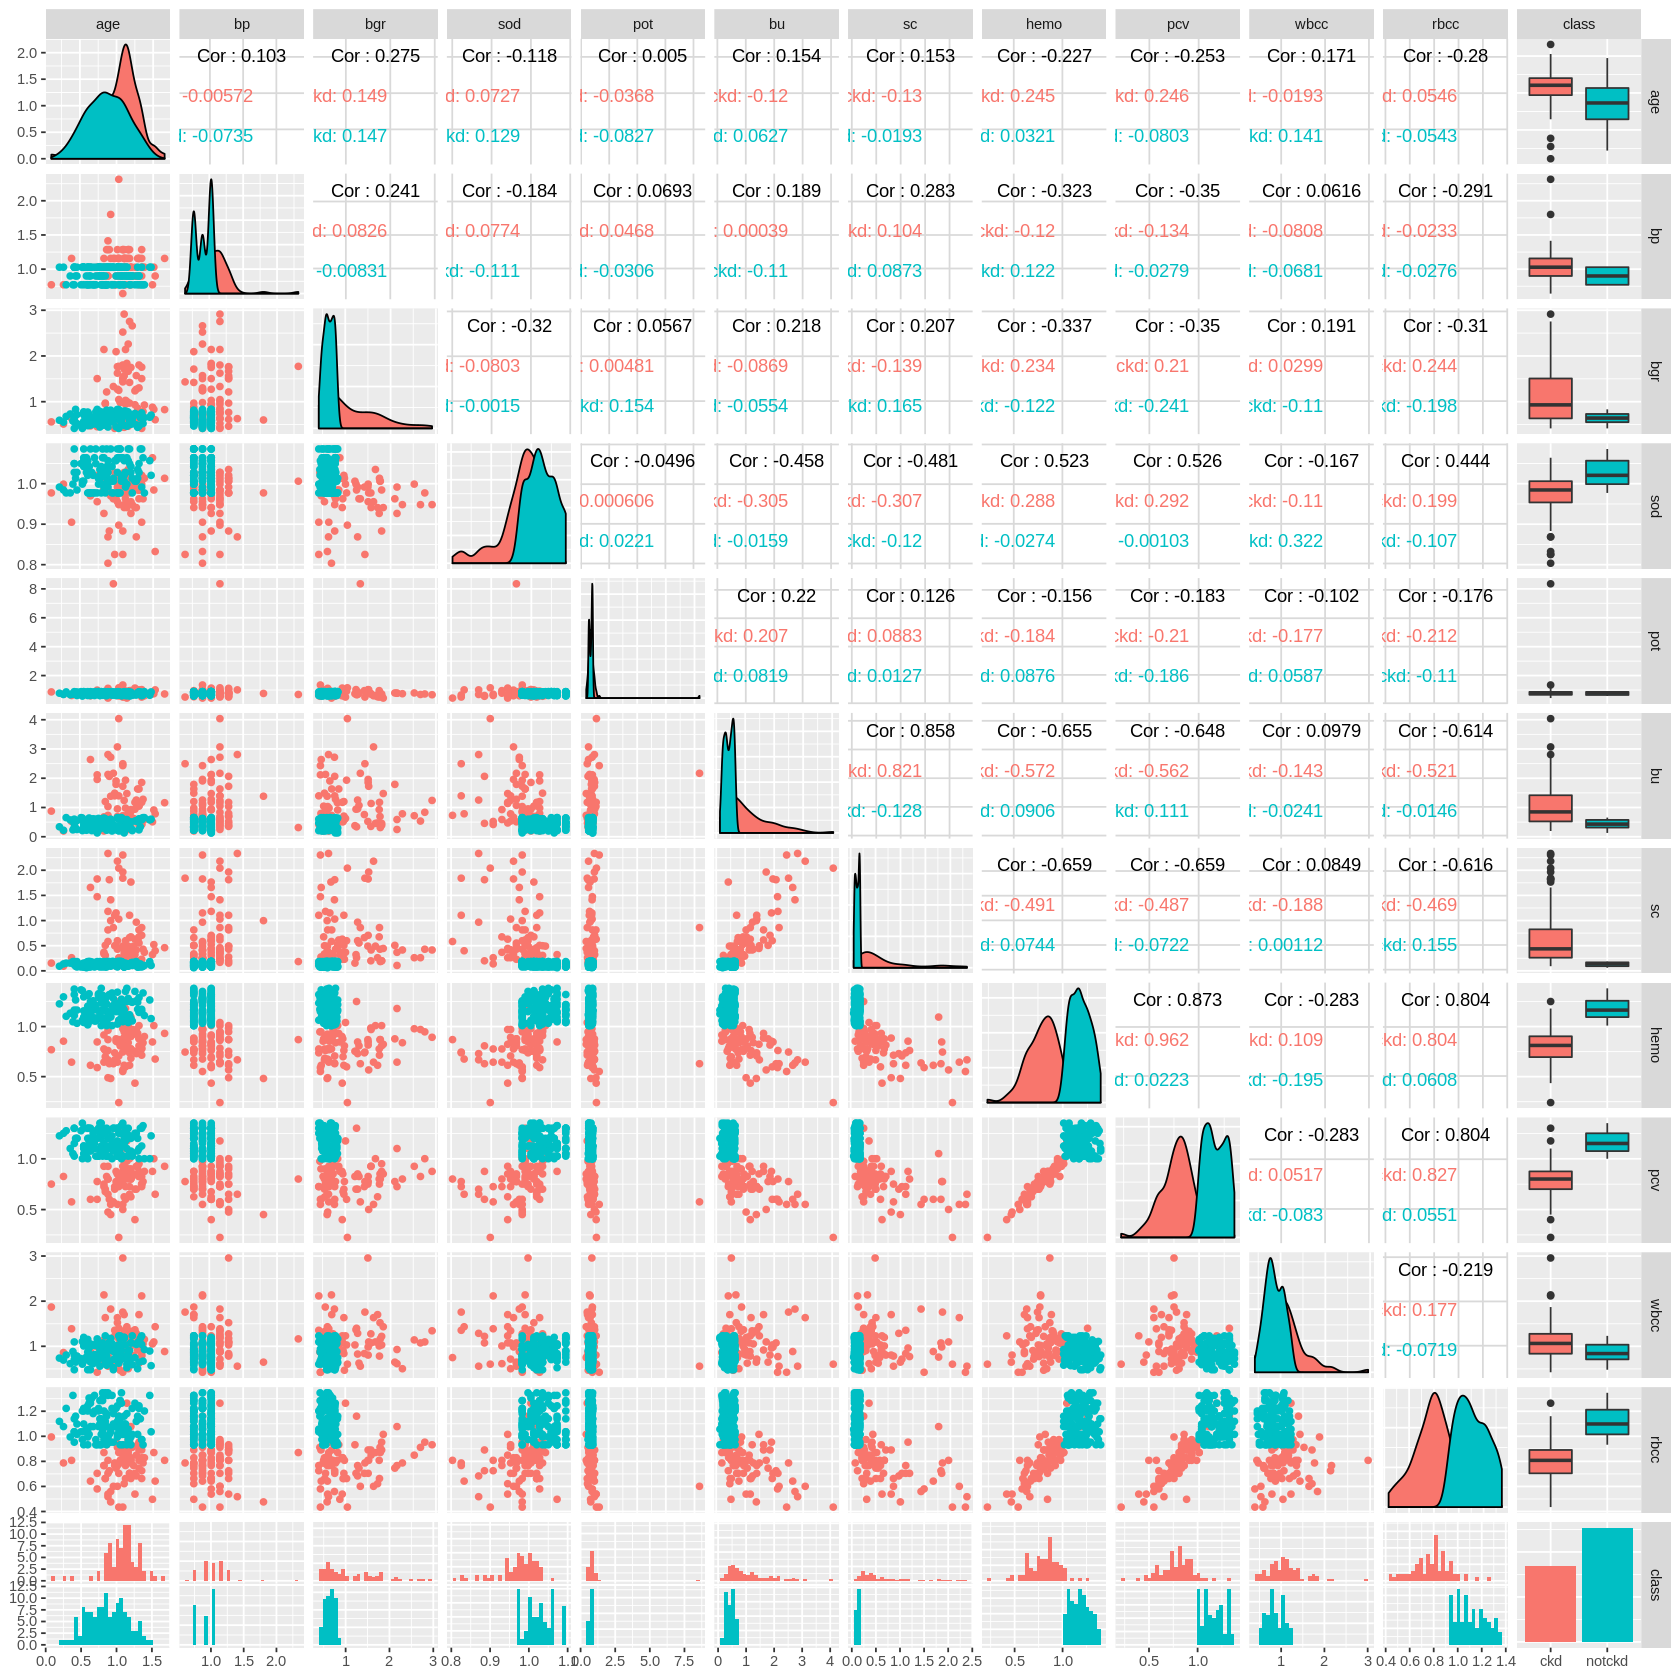

In [99]:
options(repr.plot.width = 14, repr.plot.height = 14)

glimpse_plot <- final_data %>%
                select(age:rbcc, class)

all_plot <- ggpairs(glimpse_plot, mapping = ggplot2::aes(color = class))
suppressMessages(print(all_plot))

Through this plot, we see that some predictors (like pcv, hemo, rbcc, age) have quite a noticeable distinction between the values 
depending on whether or not the patient had ckd or not. We will end up using these predictors in our comparative model.

For further exploratory data analysis, we compute the average for each predictor in each class.

In [100]:
options(repr.plot.width = 4.5 , repr.plot.height = 4.5)

# Exploratory data analysis, compute the average for each predictor in each class.
mean_class <- final_data %>%
     gather(key = 'predictor', value = 'Values',-class) %>%
     group_by(predictor,class) %>% 
     summarise(average = mean(Values, na.rm = T))

mean_class <- mean_class %>%
              group_by(predictor) %>%
              mutate(total = sum(average)) %>%
              group_by(predictor,class) %>%
              mutate(percentage = average/total) %>% 
              select(predictor,class,average,percentage)

mean_class <- mean_class[order(-mean_class$percentage),] 
mean_class


predictor,class,average,percentage
sc,ckd,0.6639178,0.8323733
bu,ckd,1.0890434,0.7164099
bgr,ckd,1.1122733,0.6355801
pcv,notckd,1.1636143,0.5980504
hemo,notckd,1.1793758,0.5955575
rbcc,notckd,1.1123258,0.5853096
wbcc,ckd,1.0994143,0.5601464
age,ckd,1.0786550,0.5540043
bp,ckd,1.0530187,0.5347499
pot,ckd,0.8730904,0.5315618


Another method of exploratory data analysis we have done is to visualize the average value of the predictors in the following filled bar plot.

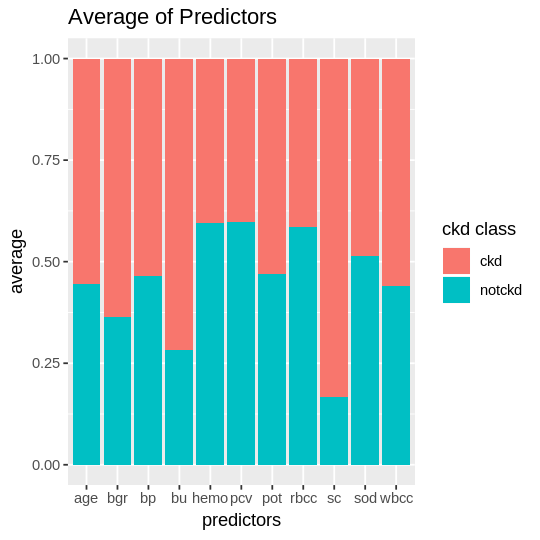

In [101]:
# Exploratory data analysis by graph
mean_class_plot <- ggplot(mean_class, aes(x = predictor, y = average, fill = class)) + 
   geom_bar( stat = "identity",position = "fill") + 
   xlab("predictors") +
   ylab("average") +
   labs(fill = "ckd class") +
   ggtitle ("Average of Predictors")

mean_class_plot

# Feature Selection

Looking at the above plots, it is evident that there is a higher average value for the bgr, bu and su variables. Thus,
we hypothesized that the predictors sc, bu, and bgr are likely to have a larger impact on the ckd class compared with 
others (pcv, hemo, rbcc, and wbcc). Therefore, we focus on these three variables as predictors.

We split the data into a training set and a testing set, using a partition parameter of 75%.  So, the training set will have 75% of the data 
and the test set will have 25% of the data. We then look at the number of observations in each class in the training and testing sets. This gives us a picture of the amount of cases we will be working against.

In [102]:
# Split data into training set and testing set, by the portion of 75%
set.seed(1234) 
set_rows <- final_data %>% 
  select(class) %>% 
  unlist() %>%
  createDataPartition(p = 0.75, list = FALSE)
head(set_rows)

training_set <- final_data %>% slice(set_rows)
testing_set <- final_data %>% slice(-set_rows)

# See the number of observations in each class in the training set 
counts_train <- training_set %>% 
          group_by(class) %>%
          summarize(n = n())
counts_train

# See the number of observations in each class in the testing set 
counts_test <- testing_set %>% 
               group_by(class) %>% 
               summarize(n = n())
counts_test



convert_class_to_numeric <- testing_set %>%
                            group_by(class) %>%
                            filter()



Resample1
1
3
5
7
9
10


class,n
ckd,63
notckd,96


class,n
ckd,21
notckd,31


From the exploratory data analysis above, we chose the variables bgr, bu, and sc as our predictors. Recall that these
variables measure blood glucose, blood urea, and serum creatinine.

In [103]:
# From the exploratory data analysis above, we find out that bgr,bu,sc as our predictors. 
X_train <- training_set %>%
                 select(bgr,bu,sc) %>% data.frame()
Y_train <- training_set %>% 
                 select(class) %>% unlist() %>% as.factor()
X_test <- testing_set %>%
                 select(bgr,bu,sc) %>% data.frame()

Y_test <- testing_set %>% 
                 select(class) %>% unlist() %>% as.factor()

In [104]:
X_train <- training_set %>%
                 select(bgr,bu,sc) %>% data.frame()
Y_train <- training_set %>% 
                 select(class) %>% unlist() %>% as.factor()
X_test <- testing_set %>%
                 select(bgr,bu,sc) %>% data.frame()

Y_test <- testing_set %>% 
                 select(class) %>% unlist() %>% as.factor()

We now choose the optimal k for the knn algorithm by looking at the smallest k which yields the highest accuracy.

In [105]:
# Choose optimal k
train_control <- trainControl(method="cv", number = 10)
k = data.frame(k = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))

set.seed(1234)
knn_model_cv_10fold <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k, trControl = train_control)
knn_model_cv_10fold

k-Nearest Neighbors 

159 samples
  3 predictor
  2 classes: 'ckd', 'notckd' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 143, 143, 143, 143, 144, 143, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9374510  0.8667741
   2  0.9499510  0.8917444
   3  0.9625000  0.9162562
   4  0.9500000  0.8886043
   5  0.9562500  0.9014778
   6  0.9375000  0.8590180
   7  0.9312500  0.8475668
   8  0.9187500  0.8169154
   9  0.9187500  0.8169154
  10  0.9120833  0.8026297
  11  0.9058333  0.7867567
  12  0.8995833  0.7708837
  13  0.8995833  0.7708837
  14  0.8995833  0.7708837
  15  0.8995833  0.7708837
  16  0.8870833  0.7366957
  17  0.8870833  0.7366957

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 3.

k,Accuracy,Kappa,AccuracySD,KappaSD
1,0.9374510,0.8667741,0.05106461,0.10964410
2,0.9499510,0.8917444,0.03958901,0.08854276
3,0.9625000,0.9162562,0.04370037,0.09865891
4,0.9500000,0.8886043,0.05743354,0.12838149
5,0.9562500,0.9014778,0.05145454,0.11703468
6,0.9375000,0.8590180,0.05892557,0.13476133
7,0.9312500,0.8475668,0.05472469,0.12294400
8,0.9187500,0.8169154,0.06620937,0.15337037
9,0.9187500,0.8169154,0.06620937,0.15337037
10,0.9120833,0.8026297,0.06020317,0.14053853


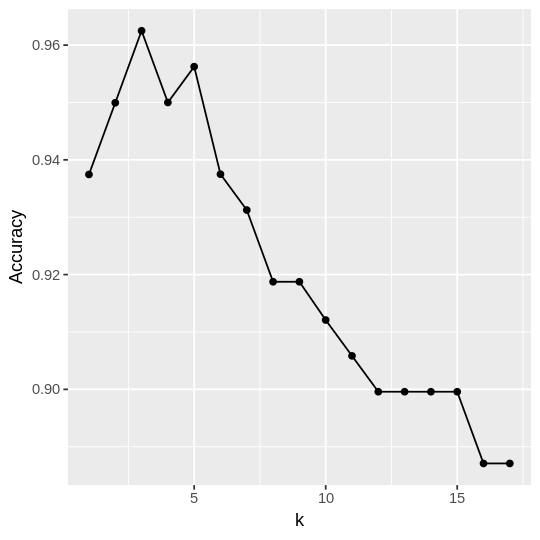

In [106]:
accuracies <- knn_model_cv_10fold$results
accuracies 


accuracy_vs_k <- ggplot(accuracies, aes(x = k, y = Accuracy)) +
  geom_point() +
  geom_line()
accuracy_vs_k

We find that k = 3 is optimal.  

In [107]:
# k = 3 as optimal
knn_model <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = data.frame(k = 3))
test_pred <- predict(knn_model, X_test)
test_results <- confusionMatrix(test_pred, Y_test)
test_results

Confusion Matrix and Statistics

          Reference
Prediction ckd notckd
    ckd     18      0
    notckd   3     31
                                          
               Accuracy : 0.9423          
                 95% CI : (0.8405, 0.9879)
    No Information Rate : 0.5962          
    P-Value [Acc > NIR] : 1.565e-08       
                                          
                  Kappa : 0.8774          
 Mcnemar's Test P-Value : 0.2482          
                                          
            Sensitivity : 0.8571          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9118          
             Prevalence : 0.4038          
         Detection Rate : 0.3462          
   Detection Prevalence : 0.3462          
      Balanced Accuracy : 0.9286          
                                          
       'Positive' Class : ckd             
                                          

We now repeat the analysis, using more variables. We use bgr, bu, sc, pcv, hemo, and wbcc as predictors, as
a second, comparative, model. 
There are two main reasons behind why we chose to use these predictors: 
- You could clearly see a distinction between the values which had ckd or not based off our Relational plot of the variables.
- the other being that the predictors had a higher average of values which did contain ckd


In [108]:
# Using  bgr,bu,sc,pcv,hemo,wbcc as predictors,as second model

X_train_2 <- training_set %>%
                 select(bgr,bu,sc,pcv,hemo,wbcc) %>% data.frame()
Y_train_2 <- training_set %>% 
                 select(class) %>% unlist() %>% as.factor()
X_test_2 <- testing_set %>%
                 select(bgr,bu,sc,pcv,hemo,wbcc) %>% data.frame()

Y_test_2 <- testing_set %>% 
                 select(class) %>% unlist() %>% as.factor()

# Choose optimal k as using bgr,bu,sc,pcv,hemo,rbcc,wbcc as predictors

train_control <- trainControl(method="cv", number = 10)
k = data.frame(k = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))

set.seed(1234)
knn_model_cv_10fold <- train(x = X_train_2, y = Y_train_2, method = "knn", tuneGrid = k, trControl = train_control)
knn_model_cv_10fold

k-Nearest Neighbors 

159 samples
  6 predictor
  2 classes: 'ckd', 'notckd' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 143, 143, 143, 143, 144, 143, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9812500  0.9576355
   2  0.9687500  0.9279693
   3  0.9687500  0.9269841
   4  0.9625000  0.9131910
   5  0.9687500  0.9279693
   6  0.9687500  0.9279693
   7  0.9562500  0.8973180
   8  0.9562500  0.8973180
   9  0.9500000  0.8844148
  10  0.9562500  0.9002878
  11  0.9437500  0.8706217
  12  0.9437500  0.8706217
  13  0.9437500  0.8706217
  14  0.9370833  0.8563360
  15  0.9370833  0.8563360
  16  0.9308333  0.8425429
  17  0.9370833  0.8563360

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 1.

k,Accuracy,Kappa,AccuracySD,KappaSD
1,0.9812500,0.9576355,0.04218428,0.09586454
2,0.9687500,0.9279693,0.06073908,0.14286616
3,0.9687500,0.9269841,0.06750772,0.15841238
4,0.9625000,0.9131910,0.06718548,0.15734975
5,0.9687500,0.9279693,0.06073908,0.14286616
6,0.9687500,0.9279693,0.06073908,0.14286616
7,0.9562500,0.8973180,0.07822910,0.18518783
8,0.9562500,0.8973180,0.07822910,0.18518783
9,0.9500000,0.8844148,0.07682954,0.18170079
10,0.9562500,0.9002878,0.06620937,0.15470854


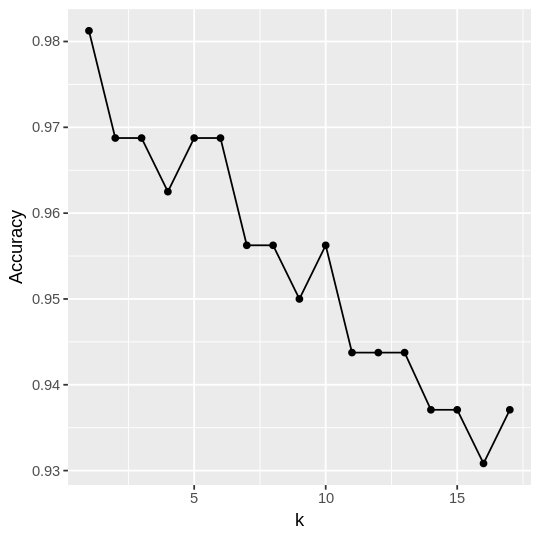

In [109]:
accuracies_2 <- knn_model_cv_10fold$results
accuracies_2 


accuracy_vs_k_2 <- ggplot(accuracies_2, aes(x = k, y = Accuracy)) +
  geom_point() +
  geom_line()
accuracy_vs_k_2

For this second model, k = 1 is optimal.

In [110]:
# k = 1 as optimal 

knn_model_2 <- train(x = X_train_2, y = Y_train_2, method = "knn", tuneGrid = data.frame(k = 1))
test_pred_2 <- predict(knn_model_2, X_test_2)
test_results_2 <- confusionMatrix(test_pred_2, Y_test_2)
test_results_2

Confusion Matrix and Statistics

          Reference
Prediction ckd notckd
    ckd     20      0
    notckd   1     31
                                          
               Accuracy : 0.9808          
                 95% CI : (0.8974, 0.9995)
    No Information Rate : 0.5962          
    P-Value [Acc > NIR] : 7.545e-11       
                                          
                  Kappa : 0.9598          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9524          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9687          
             Prevalence : 0.4038          
         Detection Rate : 0.3846          
   Detection Prevalence : 0.3846          
      Balanced Accuracy : 0.9762          
                                          
       'Positive' Class : ckd             
                                          

As a third comparison, we use all the variables as predictors. We are expecting to see a lower result in accuracy because we know there are overlapping values in the poor predictors like bp, pot, and sod.


In [111]:
# Using all predictors

X_train_all <- training_set %>%
                 select(-class) %>% data.frame()
Y_train_all <- training_set %>% 
                 select(class) %>% unlist() %>% as.factor()
X_test_all <- testing_set %>%
                 select(-class) %>% data.frame()

Y_test_all <- testing_set %>% 
                 select(class) %>% unlist() %>% as.factor()

In [112]:
# Choose optimal k as using all predictors

train_control <- trainControl(method="cv", number = 10)
k = data.frame(k = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))

set.seed(1234)
knn_model_cv_10fold <- train(x = X_train_all, y = Y_train_all, method = "knn", tuneGrid = k, trControl = train_control)
knn_model_cv_10fold

k-Nearest Neighbors 

159 samples
 11 predictor
  2 classes: 'ckd', 'notckd' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 143, 143, 143, 143, 144, 143, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9750000  0.9417625
   2  0.9620833  0.9157489
   3  0.9750000  0.9417625
   4  0.9625000  0.9140809
   5  0.9625000  0.9140809
   6  0.9687500  0.9288592
   7  0.9687500  0.9288592
   8  0.9687500  0.9288592
   9  0.9625000  0.9140809
  10  0.9625000  0.9140809
  11  0.9625000  0.9140809
  12  0.9625000  0.9140809
  13  0.9625000  0.9140809
  14  0.9562500  0.9002878
  15  0.9562500  0.9002878
  16  0.9500000  0.8855095
  17  0.9562500  0.9002878

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 3.

For the third (all predictors) model, we find that k = 1 is optimal.


k,Accuracy,Kappa,AccuracySD,KappaSD
1,0.9750000,0.9417625,0.06038074,0.1424546
2,0.9620833,0.9157489,0.06058645,0.1412090
3,0.9750000,0.9417625,0.06038074,0.1424546
4,0.9625000,0.9140809,0.06718548,0.1570534
5,0.9625000,0.9140809,0.06718548,0.1570534
6,0.9687500,0.9288592,0.06073908,0.1424371
7,0.9687500,0.9288592,0.06073908,0.1424371
8,0.9687500,0.9288592,0.06073908,0.1424371
9,0.9625000,0.9140809,0.06718548,0.1570534
10,0.9625000,0.9140809,0.06718548,0.1570534


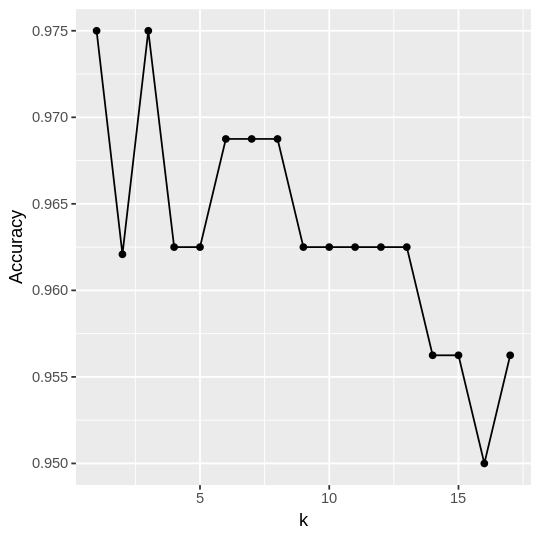

In [113]:
accuracies_all <- knn_model_cv_10fold$results
accuracies_all 


accuracy_vs_k_all <- ggplot(accuracies_all, aes(x = k, y = Accuracy)) +
  geom_point() +
  geom_line()
accuracy_vs_k_all

In [114]:
# k = 1 as optimal

knn_model_all <- train(x = X_train_all, y = Y_train_all, method = "knn", tuneGrid = data.frame(k = 1))
test_pred_all <- predict(knn_model_all, X_test_all)
test_results_all <- confusionMatrix(test_pred_all, Y_test_all)
test_results_all

Confusion Matrix and Statistics

          Reference
Prediction ckd notckd
    ckd     18      0
    notckd   3     31
                                          
               Accuracy : 0.9423          
                 95% CI : (0.8405, 0.9879)
    No Information Rate : 0.5962          
    P-Value [Acc > NIR] : 1.565e-08       
                                          
                  Kappa : 0.8774          
 Mcnemar's Test P-Value : 0.2482          
                                          
            Sensitivity : 0.8571          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9118          
             Prevalence : 0.4038          
         Detection Rate : 0.3462          
   Detection Prevalence : 0.3462          
      Balanced Accuracy : 0.9286          
                                          
       'Positive' Class : ckd             
                                          

## Comparing the accuracy for three models
Model A: 94.23% when using predictors bgr,bu,sc (k = 3)

Model B: 98.08% when using predictors bgr,bu,sc,pcv,hemo,wbcc (k = 1)

Model C: 94.23% when using all predictors (k = 1)

## Eliminating the fewest number of observations  and Repeating

We now review the above models, but removing only the fewest observations necessary to obtain tidy data for the model. Once removed, we repeat our process of knn-classification to see if it makes a difference in our prediction accuracy.


In [115]:
head(kidney_data)

age,bp,bgr,sod,pot,bu,sc,hemo,pcv,wbcc,rbcc,class
0.8834323,1.0285299,0.7197520,NA,NA,0.4703996,0.1842338,1.1958231,1.1011476,0.8734525,1.0774127,ckd
0.1288339,0.6428312,NA,NA,NA,0.2351998,0.1228225,0.8774546,0.9509911,0.6718865,NA,ckd
1.1411000,1.0285299,2.5161580,NA,NA,0.6925327,0.2763506,0.7454482,0.7758086,0.8398581,NA,ckd
0.8834323,0.8999637,0.6959586,0.8035229,0.4441594,0.7317327,0.5834069,0.8696895,0.8008346,0.7502733,0.8080595,ckd
0.9386468,1.0285299,0.6305266,NA,NA,0.3397330,0.2149394,0.9007499,0.8759129,0.8174619,0.9530958,ckd
1.1042903,1.1570962,0.4401789,1.0279302,0.5685240,0.3266664,0.1688809,0.9473404,0.9760172,0.8734525,0.9116569,ckd


In [116]:
no_na_model_1 <- kidney_data %>%
                 select(bgr,bu,sc,class) 
                
no_na_model_1 <- no_na_model_1[complete.cases(no_na_model_1),]
head(no_na_model_1)

nrow(no_na_model_1)

counts_no_na_model_1 <- no_na_model_1 %>% 
               group_by(class) %>% 
               summarize(n = n())
counts_no_na_model_1



bgr,bu,sc,class
0.7197520,0.4703996,0.1842338,ckd
2.5161580,0.6925327,0.2763506,ckd
0.6959586,0.7317327,0.5834069,ckd
0.6305266,0.3397330,0.2149394,ckd
0.4401789,0.3266664,0.1688809,ckd
0.5948364,0.7055994,3.6846752,ckd


[1] 347

class,n
ckd,205
notckd,142


In [117]:
# Split NO_NA_Model_1 into training set and testing set, by the portion of 75%

set.seed(1234) 
set_rows_fewest <- no_na_model_1 %>% 
  select(class) %>% 
  unlist() %>%
  createDataPartition(p = 0.75, list = FALSE)
head(set_rows_fewest)


training_set_fewest <- no_na_model_1 %>% slice(set_rows_fewest)
testing_set_fewest <- no_na_model_1 %>% slice(-set_rows_fewest)

# See the number of observations in each class in the training set 
counts_train_fewest <- training_set_fewest %>% 
          group_by(class) %>%
          summarize(n = n())
counts_train_fewest

# See the number of observations in each class in the testing set 
counts_test_fewest <- testing_set_fewest %>% 
               group_by(class) %>% 
               summarize(n = n())
counts_test_fewest

X_train_fewest_1 <- training_set_fewest %>%
                 select(bgr,bu,sc) %>% data.frame()
Y_train_fewest_1 <- training_set_fewest %>% 
                 select(class) %>% unlist() %>% as.factor()
X_test_fewest_1 <- testing_set_fewest %>%
                 select(bgr,bu,sc) %>% data.frame()

Y_test_fewest_1 <- testing_set_fewest %>% 
                 select(class) %>% unlist() %>% as.factor()

# Choose optimal k
train_control <- trainControl(method="cv", number = 10)
k = data.frame(k = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))

set.seed(1234)
knn_model_cv_10fold <- train(x = X_train_fewest_1, y = Y_train_fewest_1, method = "knn", tuneGrid = k, trControl = train_control)
knn_model_cv_10fold

Resample1
2
3
4
5
7
8


class,n
ckd,154
notckd,107


class,n
ckd,51
notckd,35


k-Nearest Neighbors 

261 samples
  3 predictor
  2 classes: 'ckd', 'notckd' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 235, 235, 235, 235, 236, 234, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.8932593  0.7828500
   2  0.8781595  0.7512323
   3  0.8707521  0.7385034
   4  0.8667635  0.7307218
   5  0.8783020  0.7556919
   6  0.8820057  0.7638810
   7  0.8894017  0.7802061
   8  0.8973903  0.7956811
   9  0.8970940  0.7955907
  10  0.8972479  0.7960307
  11  0.8931054  0.7878996
  12  0.8858405  0.7747922
  13  0.8895442  0.7816798
  14  0.8895442  0.7814048
  15  0.8859943  0.7761192
  16  0.8821481  0.7688684
  17  0.8783020  0.7614541

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 8.

In [118]:
# k = 8 as optimal
knn_model_fewest_1 <- train(x = X_train_fewest_1, y = Y_train_fewest_1, method = "knn", tuneGrid = data.frame(k = 8))
test_pred_fewest_1 <- predict(knn_model_fewest_1, X_test_fewest_1)
test_results <- confusionMatrix(test_pred_fewest_1, Y_test_fewest_1)
test_results

Confusion Matrix and Statistics

          Reference
Prediction ckd notckd
    ckd     41      0
    notckd  10     35
                                          
               Accuracy : 0.8837          
                 95% CI : (0.7965, 0.9428)
    No Information Rate : 0.593           
    P-Value [Acc > NIR] : 3.068e-09       
                                          
                  Kappa : 0.7694          
 Mcnemar's Test P-Value : 0.004427        
                                          
            Sensitivity : 0.8039          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.7778          
             Prevalence : 0.5930          
         Detection Rate : 0.4767          
   Detection Prevalence : 0.4767          
      Balanced Accuracy : 0.9020          
                                          
       'Positive' Class : ckd             
                                          

 ### We obtained 88.37% for the first model.


# Fewest elimination observation for model 2

In [119]:
no_na_model_2 <- kidney_data %>%
                 select(bgr,bu,sc,pcv,hemo,rbcc,wbcc,class) 
                
no_na_model_2 <- no_na_model_2[complete.cases(no_na_model_2),]
head(no_na_model_2)

nrow(no_na_model_2)

counts_no_na_model_2 <- no_na_model_2 %>% 
               group_by(class) %>% 
               summarize(n = n())
counts_no_na_model_2


bgr,bu,sc,pcv,hemo,rbcc,wbcc,class
0.7197520,0.4703996,0.1842338,1.1011476,1.1958231,1.0774127,0.8734525,ckd
0.6959586,0.7317327,0.5834069,0.8008346,0.8696895,0.8080595,0.7502733,ckd
0.6305266,0.3397330,0.2149394,0.8759129,0.9007499,0.9530958,0.8174619,ckd
0.4401789,0.3266664,0.1688809,0.9760172,0.9473404,0.9116569,0.8734525,ckd
2.4388292,0.4050663,0.1688809,1.1011476,0.9628706,1.0359737,0.7726695,ckd
0.8208742,0.7839993,0.2917035,0.8258607,0.8386292,0.8287790,1.0750184,ckd


[1] 240

class,n
ckd,107
notckd,133


In [120]:
# Split NO_NA_Model_2 into training set and testing set, by the portion of 75%

set.seed(1234) 
set_rows_fewest <- no_na_model_2 %>% 
  select(class) %>% 
  unlist() %>%
  createDataPartition(p = 0.75, list = FALSE)
head(set_rows_fewest)


training_set_fewest <- no_na_model_2 %>% 
    slice(set_rows_fewest)
testing_set_fewest <- no_na_model_2 %>% 
    slice(-set_rows_fewest)

# See the number of observations in each class in the training set 
counts_train_fewest <- training_set_fewest %>% 
    group_by(class) %>%
          summarize(n = n())
counts_train_fewest

# See the number of observations in each class in the testing set 
counts_test_fewest <- testing_set_fewest %>% 
    group_by(class) %>% 
    summarize(n = n())
counts_test_fewest

X_train_fewest_2 <- training_set_fewest %>%
    select(bgr,bu,sc,pcv,hemo,wbcc) %>%
    data.frame()
Y_train_fewest_2 <- training_set_fewest %>% 
    select(class) %>%
    unlist() %>% 
    as.factor()
X_test_fewest_2 <- testing_set_fewest %>%
    select(bgr,bu,sc,pcv,hemo
           ,wbcc) %>% 
    data.frame()

Y_test_fewest_2 <- testing_set_fewest %>% 
    select(class) %>% 
    unlist() %>% 
    as.factor()

# Choose optimal k
train_control <- trainControl(method="cv", number = 10)
k = data.frame(k = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17))

set.seed(1234)
knn_model_cv_10fold <- train(x = X_train_fewest_2, y = Y_train_fewest_2, method = "knn", tuneGrid = k, trControl = train_control)
knn_model_cv_10fold

Resample1
1
2
3
4
5
9


class,n
ckd,81
notckd,100


class,n
ckd,26
notckd,33


k-Nearest Neighbors 

181 samples
  6 predictor
  2 classes: 'ckd', 'notckd' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 163, 163, 163, 163, 163, 162, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.9666667  0.9319304
   2  0.9722222  0.9430380
   3  0.9722222  0.9430380
   4  0.9555556  0.9085686
   5  0.9611111  0.9202532
   6  0.9666667  0.9316456
   7  0.9611111  0.9202532
   8  0.9611111  0.9202532
   9  0.9611111  0.9202532
  10  0.9666667  0.9316456
  11  0.9555556  0.9085686
  12  0.9447368  0.8862696
  13  0.9447368  0.8865617
  14  0.9502924  0.8979541
  15  0.9391813  0.8748772
  16  0.9444444  0.8854917
  17  0.9444444  0.8854917

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 3.

In [121]:
# k = 1 as optimal
knn_model_fewest_2 <- train(x = X_train_fewest_2, y = Y_train_fewest_2, method = "knn", tuneGrid = data.frame(k = 3))
test_pred_fewest_2 <- predict(knn_model_fewest_2, X_test_fewest_2)
test_results <- confusionMatrix(test_pred_fewest_2, Y_test_fewest_2)
test_results

Confusion Matrix and Statistics

          Reference
Prediction ckd notckd
    ckd     26      0
    notckd   0     33
                                     
               Accuracy : 1          
                 95% CI : (0.9394, 1)
    No Information Rate : 0.5593     
    P-Value [Acc > NIR] : 1.294e-15  
                                     
                  Kappa : 1          
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.4407     
         Detection Rate : 0.4407     
   Detection Prevalence : 0.4407     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : ckd        
                                     

 ### We obtained 100% for the second model.

# Summary of results when eliminating the fewest observations

Model 1: 88.37% for the first model(bgr,bu,sc)

Model 2: 100% for the second model(bgr,bu,sc,pcv,hemo,wbcc)

# Discussion


Conclusions:  
The model that we have presented above is the best of several that were tested. The summary results of the tested models are
as follows:
- Model A (using bgr, bu, sc; with k=3) gave 94.23% accuracy
- Model B (using bgr, bu, sc, pcv, hemo, wbcc; k=1) gave 98.08% accuracy
- Model C (using all predictors; k=1) gave 94.23% accuracy.  

It can be seen that adding three predictors (Model A to Model B) resulted in an increase in accuracy percentage of 
almost 4% (3.85%). 
Whether this increased accuracy is cost-effective depends on circumstances outside the scope of this project. For
this project, it
was assumed that since the application is health-related, high accuracy is an important objective.  

A different data partition parameter (20/80 instead of 25/75 for test/training datasets) was investigated. A small difference resulted showing a slight improvement
in the accuracy of some of the models. We believe the reason that accuracy increases is due to a smaller amount of data one is testing against.
                                      
We perfomed further analysis by eliminating only observations that contained "NA" data for the variables used in the
model. That way, we eliminated the fewest possible observations for each model. These models were called Model 1 
and Model 2. The results differed from Models A, B and C. For Model 1, an accuracy of 88% was obtained. For Model 2
an accuracy of 100% was obtained.
We would not recommend relying on this model for medical diagnostic purposes until further investigation involving
significantly larger datasets can be done. (Our 100% accuracy results might not hold up for larger datasets.)
                                      
                                      
Future Research:  
Potential future investigations include:
- exploration of the benefits of using additional variables (perhaps urine tests) 
to guide decisions about which data to use.
- potentially greater use of the categorical variables in the dataset. There is some suggestion that some of these categorical predictors could prove to have predictive value. An example would be how patients with ckd are often diagnosed with anemia, and incorporating this would be done through creating data based off binary values.
- possible bifurcation of the data. A cursory exploration of the data suggests that there might be separate segments
of the data representing youth (under 10-15) and adult (over 10-15) age ranges. The graph (Figure 1) showing the APPETITE versus AGE, color-coded for each 
class (CKD and non-CKD) is an example, also reflected in some of the other variables, of the two potential separate 
manifestations of CKD. There is also a weaker suggestion of a different manifestation at older ages, but this is not
yet adequately demonstrated.)

All of these proposed investigations would require the gathering of datasets larger than the one used for this project.



Parsed with column specification:
cols(
  .default = col_character(),
  age = col_integer(),
  bp = col_integer(),
  sg = col_double(),
  al = col_integer(),
  su = col_integer(),
  bgr = col_integer(),
  bu = col_double(),
  sc = col_double(),
  sod = col_double(),
  pot = col_double(),
  hemo = col_double(),
  pcv = col_integer(),
  wbcc = col_double(),
  rbcc = col_double()
)
See spec(...) for full column specifications.
Warning message:
“Removed 9 rows containing missing values (geom_point).”Warning message:
“Removed 9 rows containing missing values (geom_point).”

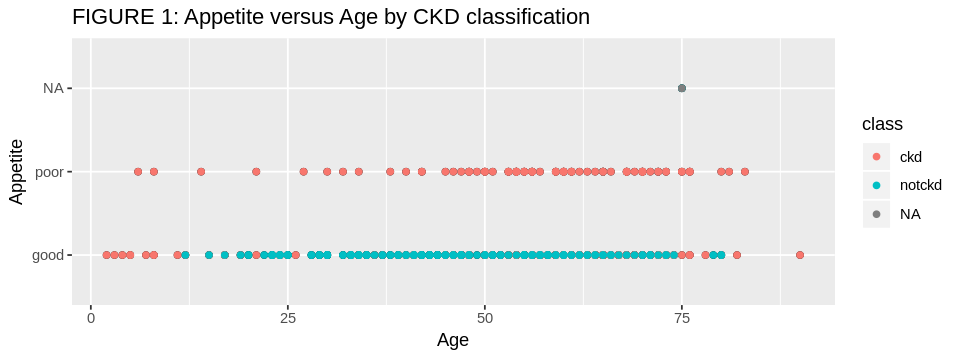

In [122]:
#Figure 1

kidney_data <- read_csv("ckd_data")
options (repr.plot.width = 8, repr.plot.height = 3)
raw_plot_ageappet <- kidney_data %>%
   ggplot (aes (x=age, y= appet)) +
      geom_point() +
      geom_point(aes(colour=class)) +
      xlab ("Age") +
      ylab ("Appetite") +
      ggtitle("FIGURE 1: Appetite versus Age by CKD classification")
raw_plot_ageappet


# Bibliography/References 

Procedures and approaches were derived from content presented in DSCI 100 course materials (Jan-Mar 2019)

Data was obtained from: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
(accessed on February 26, 2019)


“Common Causes of Chronic Kidney Disease.” CKD Causes, The Kidney Foundation of Canada, 9 Jan. 2016, www.kidney.ca/CKD-causes.
(accessed on March 11, 2019)

Coe, Fredric. “What Filtration Is.” Kidney Stone Evaluation And Treatment Program, The University of Chicago, 19 Mar. 2019, kidneystones.uchicago.edu/kidney-stones-kidney-function-kidney-disease/.
(Accessed on April 2, 2019)

“PCV - Understand the Test.” Lab Tests Online, American Association for Clinical Chemistry, 11 June 2012, labtestsonline.org.uk/tests/pcv.

Higgins, Chris. “Urea and Creatinine Concentration, the Urea:Creatinine Ratio.” Urea and Creatinine Concentration, the Urea:Creatinine Ratio, Radiometer Medical Aps, 4 Oct. 2016, acutecaretesting.org/en/articles/urea-and-creatinine-concentration-the-urea-creatinine-ratio.